# Tutorial 0: Overview of built-in examples

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn

MAVE-NN comes with built-in demos, tutorials, models, and datasets. Tutorials are provided in the form of Jupyter notebooks (like this one). To get a list of tutorials notebooks, as well as their locations on your local machine, import `mavenn` and execute the following:

In [2]:
mavenn.list_tutorials()

The following MAVE-NN tutorials are available (as Jupyter notebooks):

	tutorial_0_built-in_examples.ipynb
	tutorial_1_mpsa_analysis.ipynb

These tutorial files are located in

	/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/tutorials/



A list of example datasets included within mavenn can be seen by execute the following:

In [3]:
mavenn.load_example(which='training_data')

Please enter a dataset name. Valid choices are:
"gb1"
"mpsa"
"sortseq"


These string values represent different multiplex assays (see references) and entering any of these names into the load_example function returns a pandas dataframe containing sequences and their associated measurements. For example, using 'mpsa' as the input string loads the massively parallel splicing assay (MPSA) dataset reported by Wong et al., 2018.

In [4]:
mpsa_df = mavenn.load_example(which='training_data', name='mpsa')
mpsa_df.head()

,x,y
0,TAAGCTTTA,-3.455265
1,GCAGCCTAT,-3.135494
2,GTGGTAAGG,2.291043
3,TGGGCGCAG,-3.147840
4,GGTGCGGGC,0.547527


Note that the prefix of 'training\_' in the which parameter indicates that this dataset was used to train a MAVE-NN model. Held-out test data can be obtained by setting `which='test_data'`. 

This mpsa dataframe show above consists of continuous measurement values  $y$  and is appropriate for use with global epistasis regression in MAVE-NN. Using 'gb1' as the string value yields a similar dataframe. Using 'sortseq' as the dataset name yields a dataset appropiate for measurement process agnostic (MPA) regression in MAVE-NN:

In [5]:
sortseq_df = mavenn.load_example_dataset('sortseq')
sortseq_df.head()

,y,ct,x
0,4,23.0,GGCTGTTCACTTTATGCTTCCGGCTTGTATTTTGTGTGC
1,2,12.0,GGTTTTACACATTATGCTTCCGGCTCGTCTCTTGTGTGG
2,1,11.0,GGCTTAACACTTAATGCTTCCGGCTCGTATGTTGTGTGG
3,5,10.0,GGTTTTACACTTTATGCTTCCCGCTCGTAAGGTGTGTCG
4,2,10.0,GGCTTTACACTTTATGCGTCCGGCTCGTATGTTGCGTGG


In this dataframe, $y$ indicates the bin number the sequences were sorted into and 'ct' indicates the count that sequence in that bin. 

In addition to loading datasets, the `load_example` method also allows for MAVE-NN models to be loaded and subsequently used on the above example datasets. To see a list of models that be loaded with MAVE-NN, execute load_example with which set to 'model':

In [6]:
mavenn.load_example(which='model')

Please enter a model name. Valid choices are:
"gb1_ge_additive"
"mpsa_ge_additive"
"mpsa_ge_neighbor"
"mpsa_ge_pairwise"
"sortseq_mpa_additive"


We now load the mpsa additive and pairwise example models and use them in conjunction with the mpsa dataset loaded above. 

In [7]:
mpsa_additive = mavenn.load_example(which='model',name='mpsa_ge_additive')
mpsa_pairwise = mavenn.load_example(which='model',name='mpsa_ge_pairwise')

Model loaded from these files:
	/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/models/mpsa_ge_additive.pickle
	/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/models/mpsa_ge_additive.h5
Model loaded from these files:
	/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/models/mpsa_ge_pairwise.pickle
	/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/models/mpsa_ge_pairwise.h5


In [8]:
#mpsa_additive.gpmap_type
mpsa_additive.regression_type

'GE'

The `mpsa_additive` and `mpsa_pairwise` variables contain the MAVE-NN model objects, from which a number of helpful attributes and functions can be accessed. E.g., the function `x_to_yhat()` can be used to make predictions on input sequences. 

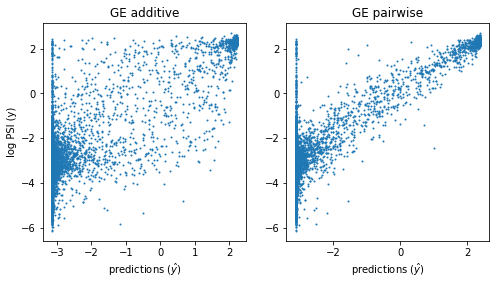

In [9]:
x = mpsa_df['x'].values
y = mpsa_df['y'].values

fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].scatter(mpsa_additive.x_to_yhat(x),y,s=1)
ax[0].set_title(mpsa_additive.regression_type+' '+mpsa_additive.gpmap_type)
ax[0].set_ylabel('log PSI (y)')
ax[0].set_xlabel('predictions ($\hat{y}$)')

ax[1].scatter(mpsa_pairwise.x_to_yhat(x),y,s=1)
ax[1].set_title(mpsa_pairwise.regression_type+' '+mpsa_pairwise.gpmap_type)
ax[1].set_xlabel('predictions ($\hat{y}$)')
plt.show()

The function `x_to_phi` can be used to obtain the latent phenotype $\phi$ from sequences. Additionally, we can evaluate the function on a grid `phi_to_yhat` and plot it against $\phi$.

In [10]:
phi_additive = mpsa_additive.x_to_phi(x)
phi_additive_lim = [min(phi_additive)-.5, max(phi_additive)+.5]
phi_additive_grid = np.linspace(phi_additive_lim[0], phi_additive_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_additive_grid = mpsa_additive.phi_to_yhat(phi_additive_grid)

phi_pairwise = mpsa_pairwise.x_to_phi(x)
phi_pairwise_lim = [min(phi_pairwise)-.5, max(phi_pairwise)+.5]
phi_pairwise_grid = np.linspace(phi_pairwise_lim[0], phi_pairwise_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_pairwise_grid = mpsa_pairwise.phi_to_yhat(phi_pairwise_grid)

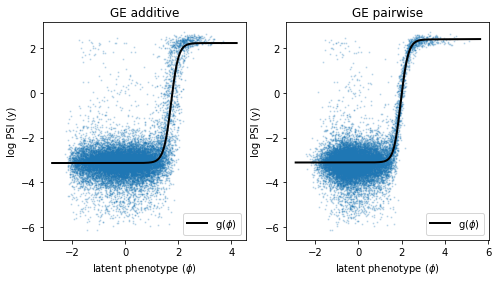

In [11]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

ax[0].scatter(phi_additive,y,s=1,alpha=0.2)
ax[0].plot(phi_additive_grid,yhat_additive_grid, color='black',lw=2,label='g($\phi$)')
ax[0].set_title(mpsa_additive.regression_type+' '+mpsa_additive.gpmap_type)
ax[0].set_ylabel('log PSI (y)')
ax[0].set_xlabel('latent phenotype ($\phi$)')
ax[0].legend()

ax[1].scatter(phi_pairwise,y,s=1,alpha=0.2)
ax[1].plot(phi_pairwise_grid,yhat_pairwise_grid,color='black',lw=2,label='g($\phi$)')
ax[1].set_title(mpsa_pairwise.regression_type+' '+mpsa_pairwise.gpmap_type)
ax[1].set_ylabel('log PSI (y)')
ax[1].set_xlabel('latent phenotype ($\phi$)')
ax[1].legend()

plt.show()

Demos, on the other, hand are self-contained Python scripts that can be executed by calling `mavenn.run_demo()`. To get a list of demo names, execute: 

In [12]:
mavenn.list_demos()

To run a demo, execute

	>>> mavenn.run_demo(name)

where 'name' is one of the following strings:

	1. "gb1_ge_evaluation"
	2. "mpsa_ge_training"
	3. "sortseq_mpa_visualization"

Python code for each demo is located in

	/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/demos/



The `"gb1_ge_evaluation"` demo illustrates an additive G-P map, along with a heteroskedastic Gaussian GE measurement process, fit to data from a deep mutational scanning (DMS) experiment on the protein GB1 performed by Olson et al., 2014. To see the code for this demo, set `print_code=True`.

Running /Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/demos/gb1_ge_evaluation.py...
Model loaded from these files:
	/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/models/gb1_ge_additive.pickle
	/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/models/gb1_ge_additive.h5


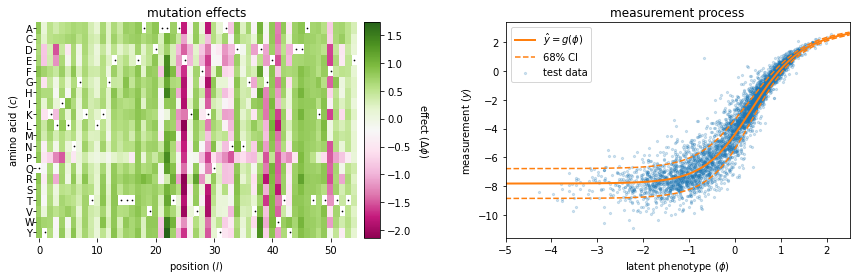

Done!


In [13]:
mavenn.run_demo("gb1_ge_evaluation", print_code=False)

The `"sortseq_mpa_visualization"` demo illustrates an additive G-P map, along with an MPA measurement process, fit to data from a sort-seq massively parallel reporter assay (MPRA) performed by Kinney et al., 2010. 

Running /Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/demos/sortseq_mpa_visualization.py...
Model loaded from these files:
	/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/models/sortseq_mpa_additive.pickle
	/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/models/sortseq_mpa_additive.h5


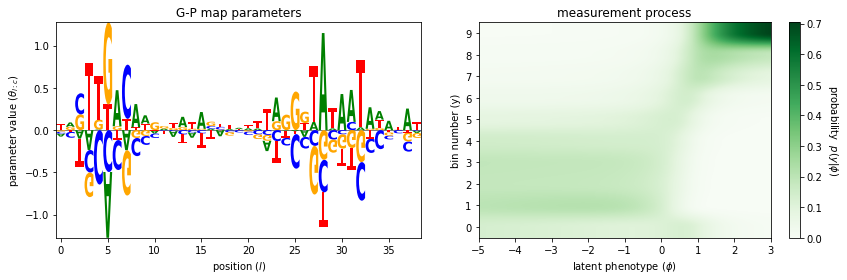

Done!


In [14]:
mavenn.run_demo("sortseq_mpa_visualization", print_code=False)

The `"mpsa_ge_training"` demo trains a pairwise G-P map, along with a homoskedastic Gaussian measurement process, on data from a massively parallel splicing assay (MPSA) reported by Wong et al., 2018. This training takes ~20 seconds on a standard laptop.

Running /Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn/examples/demos/mpsa_ge_training.py...
Epoch 1/30
264/264 [==============================] - 0s 1ms/step - loss: 342.8289 - val_loss: 219.8063
Epoch 2/30
264/264 [==============================] - 0s 974us/step - loss: 191.3024 - val_loss: 171.3452
Epoch 3/30
264/264 [==============================] - 0s 971us/step - loss: 157.3654 - val_loss: 146.7862
Epoch 4/30
264/264 [==============================] - 0s 936us/step - loss: 138.4048 - val_loss: 132.0516
Epoch 5/30
264/264 [==============================] - 0s 916us/step - loss: 126.7236 - val_loss: 122.6941
Epoch 6/30
264/264 [==============================] - 0s 889us/step - loss: 119.1508 - val_loss: 116.4437
Epoch 7/30
264/264 [==============================] - 0s 940us/step - loss: 113.9447 - val_loss: 111.9960
Epoch 8/30
264/264 [==============================] - 0s 967us/step - loss: 110.1192 - val_loss: 108.6060
Epoch 9/30
264/264 [===============

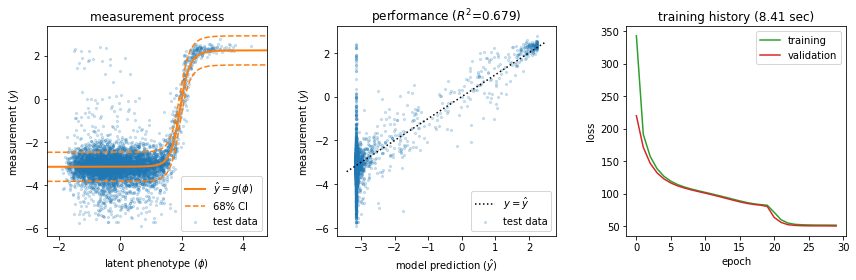

Done!


In [15]:
mavenn.run_demo("mpsa_ge_training", print_code=False)

### References

1. Olson, C., Wu, N., Sun, R. (2014). A comprehensive biophysical description of pairwise epistasis throughout an entire protein domain. Current biology : CB  24(22), 2643 - 2651. https://dx.doi.org/10.1016/j.cub.2014.09.072

1. Kinney, J., Murugan, A., Callan, C., Cox, E. (2010). Using deep sequencing to characterize the biophysical mechanism of a transcriptional regulatory sequence Proceedings of the National Academy of Sciences  107(20), 9158-9163. https://dx.doi.org/10.1073/pnas.1004290107

1. Wong, M., Kinney, J., Krainer, A. (2018). Quantitative Activity Profile and Context Dependence of All Human 5' Splice Sites. Molecular cell  71(6), 1012-1026.e3. https://dx.doi.org/10.1016/j.molcel.2018.07.033